<a href="https://colab.research.google.com/github/sanjay6131/project-2-final/blob/main/project%202%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 2



CSPMA 4413
Sanjay Katuwal/
Dr. Jacob 

Using Taylor,s expansion and computing functions from project 1 of sinx centered at π/4

In [ ]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def absoluteError(estimatevalue, actual_Value):
  return actual_Value - estimatevalue

def relativeError(estimatevalue, actual_Value):
  return absoluteError(estimatevalue, actual_Value)/actual_value

def approximateError(previousEstimatevalue, currentEstimatevalue):
  return currentEstimatevalue - previousEstimatevalue

def relativeApproxiamteError(previousEstimatevalue, currentEstimatevalue):
  return approximateError(previousEstimatevalue, currentEstimatevalue)/currentEstimatevalue

def generalTaylorCoefficient(n):
  return (-1)**(math.floor(n/2))/(sqrt2*math.factorial(n))

def taylorPolynomialTerm(n, input):
  return generalTaylorCoefficient(n)*(input-pi/4)**n

def taylorPolynomial(n, input):
  sum = 0
  for i in range(0, n+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum



## Derivative Functions

The derivative approximating functions are given as:

Forward difference is
$$
f'(x_1)\approx \frac{f(x_1+\Delta x)-f(x_1)}{\Delta x}
$$

The backward difference is
$$
f'(x_1)\approx \frac{f(x_1)-f(x_1-\Delta x)}{\Delta x}
$$

The central difference is
$$
f'(x_1)\approx \frac{f(x_1+\Delta x)-f(x_1-\Delta x)}{2\Delta x}
$$

The second order derivative for finite difference is:
$$
f''(x_1)\approx \frac{f(x_1+2\Delta x)-2f(x_1+\Delta x)+f(x_1)}{\left(\Delta x\right)^2}
$$

In [ ]:
def forwardDifference(function,original,stepSize):
  return (function(original+stepSize)-function(original))/stepSize

def backwardDifference(function,original,stepSize):
  return (function(original)-function(original-stepSize))/stepSize

def centralDifference(function,original,stepSize):
  return (function(original+stepSize)-function(original-stepSize))/(2*stepSize)

def finiteDifference(function,original,stepSize):
  return (function(original+2*stepSize)-2*function(original+stepSize)+function(original))/stepSize**2

In [ ]:

stepSizes = [1, .2 , .02 , .002,.0002]
forward = [forwardDifference(math.sin, pi/2,step) for step in stepSizes]
backward = [backwardDifference(math.sin, pi/2,step) for step in stepSizes]
central = [centralDifference(math.sin, pi/2,step) for step in stepSizes]
finite = [finiteDifference(math.sin, pi/2,step) for step in stepSizes]

actual_value = 1/sqrt2

absoluteforward = [absoluteError(Estimate,actual_value) for Estimate in forward]
relativeforward = [relativeError(Estimate, actual_value) for Estimate in forward]

absolutebackward = [absoluteError(Estimate,actual_value) for Estimate in backward]
relativebackward = [relativeError(Estimate, actual_value) for Estimate in backward]

absolutecentral = [absoluteError(Estimate,actual_value) for Estimate in central]
relativecentral = [relativeError(Estimate, actual_value) for Estimate in central]

actual_Second = -1/sqrt2 

absolutefinite = [absoluteError(Estimate,actual_Second) for Estimate in finite]
relativefinite = [relativeError(Estimate, actual_Second) for Estimate in finite]

In order to make a beautiful table I am going to use the package plotly.  It is useful for creating visualizations.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}]]
)


fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Forward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,forward,absoluteforward,relativeforward])),row = 1, col = 1)
                     

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,backward,absolutebackward,relativebackward])),row = 2, col = 1)
                     
fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,central,absolutecentral,relativecentral])),row = 3, col = 1)

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,finite,absolutefinite,relativefinite]))
                     ,row = 4, col = 1)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,backward,absolutebackward,relativebackward]))
                     ])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,central,absolutecentral,relativecentral]))
                     ])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [stepSizes,finite,absolutefinite,relativefinite]))
                     ])
fig.show()

From above we can see that forward estimate is an over estimate and backward estimate is underestimate but central estimate is the best way to estimate. For finite difference there is no other approximation.









##Lagrange Interpolation

In [ ]:
def lagrangeCoefficient(input_Array,output_Array,Entry,Variable):
  lc = 1
  for i in range(len(input_Array)):
    if i == Entry:
      continue
    else:
      lc = lc*(Variable - input_Array[i])/(input_Array[Entry]-input_Array[i])
  return lc

def lagrangeInterpolator(input_Array, output_Array, Variable):
  li = 0
  for i in range(len(input_Array)):
    li = li + lagrangeCoefficient(input_Array,output_Array,i,Variable)*output_Array[i]
  return li


Here the functions below will compute coefficient and also creates the larange interpolation.

In [ ]:
input_Values = [pi/2,pi/2+.1,pi/2]
output_Values = [math.sin(x) for x in input_Values]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in true_divide



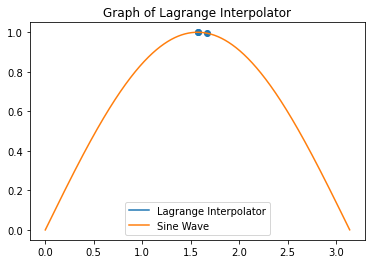

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,pi,.001)
plt.scatter(input_Values,output_Values)
plt.plot(x,lagrangeInterpolator(input_Values,output_Values,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', 'Sine Wave'])

plt.show()


using the derivative

In [ ]:
functionErrors = [absoluteError(lagrangeInterpolator(input_Values,output_Values,pi/4+.2),math.sin(pi/4+.2)),relativeError(lagrangeInterpolator(input_Values,output_Values,pi/4+.2),math.sin(pi/4+.2))]

In [ ]:
function_Errors

also doing the 3 point derivative for the larange interpolation.

In [ ]:
second_DerivativeOfLagrangeInterpolation = 2*output_Values[0]/((input_Values[0]-input_Values[1])*(input_Values[0]-input_Values[2]))+2*output_Values[1]/((input_Values[1]-input_Values[0])*(input_Values[1]-input_Values[2]))+2*output_Values[2]/((input_Values[2]-input_Values[0])*(input_Values[2]-input_Values[1]))

In [ ]:
second_DerivativeOfLagrangeInterpolation

In [ ]:
second_DerivativeErrors = [absoluteError(second_DerivativeOfLagrangeInterpolation,-1/sqrt2),relative_Error(second_DerivativeOfLagrangeInterpolation,-1/sqrt2)]

In [ ]:
second_DerivativeErrors

second derivative is not a good idea.